In [3]:
from IPython.display import Markdown, display
display(Markdown("header.md"))

<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> AI Booster Week 02 - Python for Data Science </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         Paris | © Antoine SCHERRER
    </span>
</div>

Please make sure you have a working installation of Jupyter Notebook / Jupyter Lab, with Python 3.6+ up and running.

## Naming conventions

Since we will implement functions that are already available in python standard library or other libraries, you will have to *prefix* every function with `msds_` prefix.

For instance, the function implementing the `mean` function should be named `msds_mean`.

For every function you write, **you will need to write a test function** that should be named `test_[function_name]`.

For instance, the test function for `msds_mean` will be: `test_msds_mean`.

**don't forget to document all you function with Python docstring**

For instance:
```
def msds_my_awesome_function():
    """
    This function computes an awesome function
    """
    # Awesome code
    ...
```

All function should be in snake case (no Camel case!)

When creating classes, then follow these rules:
 - class names should be in camel case
 - method names should be in snake case
 - attribute names should be in snake case

## Exercise's difficulty

Every exercise will be prefixed with an indication of its difficulty:
 - [easy]: easy exercise, should be pretty straightforward for you
 - [moderate]: intermediate level exercise, you all should manage to solve them
 - [advanced]: for advanced students who want to go deeper/further

**Advanced exercises are not mandatory.**

## Required libraries

These are the libraries we will use (to check our computations for instance), you need to install them in your virtual environment:

 - `pandas`: data manipulation library
 - `scipy`: scientific library in Python
 - `numpy`: vector/matrix computations
 - `statistics`: statistics library
 - `matplotlib`: plotting lib
 - `seaborn`: alternative plotting lib (based on matplotlib)
 - `jupyter_black`: plugin for jupyter to allow `black` (code formatter) to run
 - `unittest`: testing library 




## Session 02 - Univariate statistics

In [4]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
import jupyter_black

jupyter_black.load()

## Qualitative data
To explore qualitative data, we will compute summary tables.

### [easy] summary table (in percentage)

Write a function that computes a summary table (in percentage) of categorical data (passed as an iterable)
The output should be a dictionary with keys being all possible values in the data, and values being the frequency (in percent). 
Test your function using the `salary.csv` dataset on categorical columns and on the `romeo_juliet.txt`file to analyze words/letter frequencies.

编写一个函数，计算分类数据的汇总表（以百分比为单位）（以可迭代形式传递）
输出应该是一个字典，键是数据中所有可能的值，值是频率（百分比）。
使用 `salary.csv` 数据集对分类列进行测试，并使用 `romeo_juliet.txt` 文件对单词/字母频率进行分析。

In [7]:
df = pd.read_csv("../Session_01/data/salary.csv")   # 相对路径返回上一级用..
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [20]:
def msds_summary_table(data):
    """
    computing a summary table (frequency of each different value)
    in a list
    """
    freq = {}
    N = len(data)
    # print(N)
    for element in data:
        freq[element] = freq.get(element, 0) + 1
    # for key, value in freq.items():
    #     freq[key] = value / N * 100
    for key in freq.keys():
        freq[key] = freq[key] / N * 100

    # print(freq)

    return freq


def test_msds_summary_table():
    test_data1 = ["A", "A", "B", "C"]
    summary_test_data1 = msds_summary_table(test_data1)
    assert len(summary_test_data1) == 3, f"{len(summary_test_data1)} != 3"
    assert (
        sum(summary_test_data1.values()) == 100
    ), f"{sum(summary_test_data1.values())} != 100"
    assert summary_test_data1["A"] == 50, f"{summary_test_data1['A']} != 50"

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_words = msds_summary_table(txt_data.split())
        letters = "".join(
            [a.upper().strip().replace(" ", "") for a in txt_data.split()]
        )
        summary_letters = msds_summary_table(letters)
        assert len(summary_words) == 6338, f"{len(summary_words)} != 6338"
        assert len(summary_letters) == 37, f"{len(summary_letters)} != 37"
        assert (
            summary_letters["E"] - 11.394633426391877
        ) < 1e-5, f"{summary_letters['E']} != 10.9736362157"

    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    summary_salary_data = msds_summary_table(salary_data.Gender)
    assert len(summary_salary_data) == 3
    assert sum(summary_salary_data.values()) == 100
    assert abs(summary_salary_data["Male"] - 51.73333333333) < 1e-5


test_msds_summary_table()

{'A': 50.0, 'B': 25.0, 'C': 25.0}
{'ACT': 0.019501540621709116, 'I': 2.1295682358906354, 'PROLOGUE': 0.0078006162486836455, 'Two': 0.015601232497367291, 'households,': 0.0039003081243418228, 'both': 0.04680369749210188, 'alike': 0.0039003081243418228, 'in': 1.0920862748157103, 'dignity,': 0.0039003081243418228, 'In': 0.12480985997893833, 'fair': 0.12871016810328018, 'Verona,': 0.0078006162486836455, 'where': 0.08190647061117828, 'we': 0.1872147899684075, 'lay': 0.04290338936776005, 'our': 0.21061663871445843, 'scene,': 0.0039003081243418228, 'From': 0.02340184874605094, 'ancient': 0.031202464994734582, 'grudge': 0.0039003081243418228, 'break': 0.015601232497367291, 'to': 1.6849331097156675, 'new': 0.04680369749210188, 'mutiny,': 0.0039003081243418228, 'Where': 0.09750770310854558, 'civil': 0.015601232497367291, 'blood': 0.04290338936776005, 'makes': 0.04290338936776005, 'hands': 0.03510277311907641, 'unclean.': 0.0039003081243418228, 'forth': 0.02340184874605094, 'the': 2.3830882639728

### [moderate] summary table (counts and percentages)

Write a function that computes both the frequency in percentage and number of occurence, it should output a dict of dict like this on ['A','A','B','C']:

`{'A': {'cpt': 2, 'freq': 50.0}, 'B': {'cpt': 1, 'freq': 25.0}, 'C': {'cpt': 1, 'freq': 25.0}}`


In [22]:
def msds_summary_table_full(data):
    freq = {}
    N = len(data)
    for element in data:
        if element in freq:
            # 字典中已有此元素
            freq[element]["cpt"] += 1
        else:
            # 字典中首次出现此元素
            freq[element] = {"cpt": 1, "freq": None}
    for key, value in freq.items():
        freq[key]["freq"] = freq[key]["cpt"] / N * 100
    print(freq)

    return freq


def test_msds_summary_table_full():
    test_data1 = ["A", "A", "B", "C"]
    summary_test_data1 = msds_summary_table_full(test_data1)
    assert len(summary_test_data1) == 3
    assert sum([x["freq"] for x in summary_test_data1.values()]) == 100
    assert summary_test_data1["A"]["freq"] == 50
    assert summary_test_data1["A"]["cpt"] == 2

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_words = msds_summary_table_full(txt_data.split())
        letters = "".join(
            [a.upper().strip().replace(" ", "") for a in txt_data.split()]
        )
        summary_letters = msds_summary_table_full(letters)
        assert len(summary_words) == 6338, f"{len(summary_words)} != 6338"
        assert len(summary_letters) == 37, f"{len(summary_letters)} != 37"
        assert abs(summary_letters["E"]["freq"] - 11.394633426391877) < 1e-5
        assert summary_letters["E"]["cpt"] == 12816

    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    assert len(summary_salary_data) == 3
    assert sum([x["freq"] for x in summary_salary_data.values()]) == 100
    assert abs(summary_salary_data["Male"]["freq"] - 51.73333333333) < 1e-5
    assert summary_salary_data["Male"]["cpt"] == 194


test_msds_summary_table_full()

{'A': {'cpt': 2, 'freq': 50.0}, 'B': {'cpt': 1, 'freq': 25.0}, 'C': {'cpt': 1, 'freq': 25.0}}
{'ACT': {'cpt': 5, 'freq': 0.019501540621709116}, 'I': {'cpt': 546, 'freq': 2.1295682358906354}, 'PROLOGUE': {'cpt': 2, 'freq': 0.0078006162486836455}, 'Two': {'cpt': 4, 'freq': 0.015601232497367291}, 'households,': {'cpt': 1, 'freq': 0.0039003081243418228}, 'both': {'cpt': 12, 'freq': 0.04680369749210188}, 'alike': {'cpt': 1, 'freq': 0.0039003081243418228}, 'in': {'cpt': 280, 'freq': 1.0920862748157103}, 'dignity,': {'cpt': 1, 'freq': 0.0039003081243418228}, 'In': {'cpt': 32, 'freq': 0.12480985997893833}, 'fair': {'cpt': 33, 'freq': 0.12871016810328018}, 'Verona,': {'cpt': 2, 'freq': 0.0078006162486836455}, 'where': {'cpt': 21, 'freq': 0.08190647061117828}, 'we': {'cpt': 48, 'freq': 0.1872147899684075}, 'lay': {'cpt': 11, 'freq': 0.04290338936776005}, 'our': {'cpt': 54, 'freq': 0.21061663871445843}, 'scene,': {'cpt': 1, 'freq': 0.0039003081243418228}, 'From': {'cpt': 6, 'freq': 0.023401848746

### [easy] visualizing summary tables

Write a function that plots a summary table, with appropriate axis values and labels.

*Use `matplotlib` as plotting engine.*

Test your implementation on letter frequencies (Romeo and Juliet) and qualitative variables from `salary.csv`

{'Male': {'cpt': 194, 'freq': 51.733333333333334}, 'Female': {'cpt': 179, 'freq': 47.733333333333334}, nan: {'cpt': 2, 'freq': 0.5333333333333333}}
{'A': {'cpt': 8240, 'freq': 7.3261375962444655}, 'C': {'cpt': 2284, 'freq': 2.0306915375998007}, 'T': {'cpt': 9708, 'freq': 8.63132812916763}, 'I': {'cpt': 6909, 'freq': 6.14275299180255}, 'P': {'cpt': 1551, 'freq': 1.3789853655066948}, 'R': {'cpt': 6488, 'freq': 5.76844426267404}, 'O': {'cpt': 8805, 'freq': 7.828475914433558}, 'L': {'cpt': 4975, 'freq': 4.4232444831694435}, 'G': {'cpt': 1838, 'freq': 1.6341554492593846}, 'U': {'cpt': 3758, 'freq': 3.3412166367338227}, 'E': {'cpt': 12816, 'freq': 11.394633426391877}, 'W': {'cpt': 2519, 'freq': 2.239628714191724}, 'H': {'cpt': 6787, 'freq': 6.034283478848445}, 'S': {'cpt': 6585, 'freq': 5.854686416416238}, 'D': {'cpt': 3934, 'freq': 3.4976972455856465}, ',': {'cpt': 2717, 'freq': 2.4156693991500258}, 'B': {'cpt': 1715, 'freq': 1.5247968419368032}, 'K': {'cpt': 831, 'freq': 0.7388374202037804

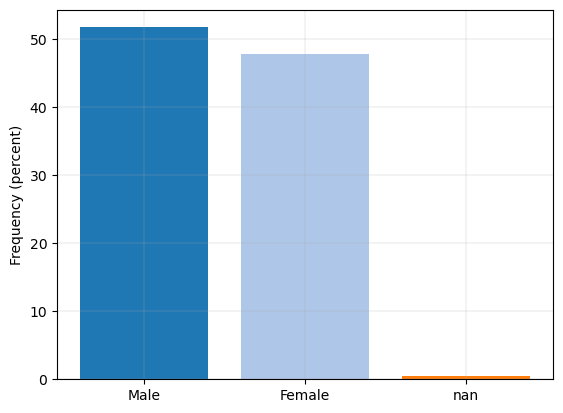

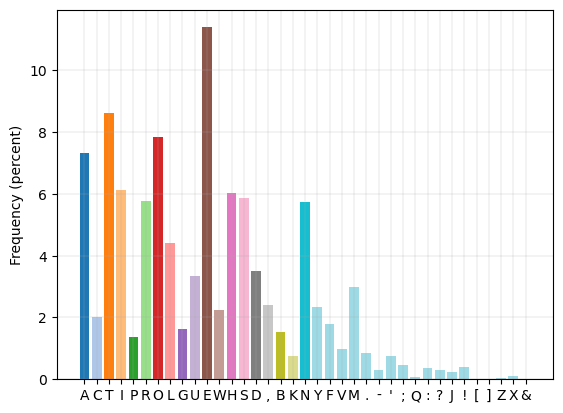

In [44]:
def msds_plot_summary_table(table, freqs=True):
    fig, ax = plt.subplots()
    # x = []
    # for e in table.keys():
    #     x.append(str(e))
    x = [str(e) for e in table.keys()]
    if freqs:
        y = [v["freq"] for v in table.values()]
        ylabel = "Frequency (percent)"
    else:
        y = [v["cpt"] for v in table.values()]
        ylabel = "Counts"

    cmap = plt.cm.tab20
    print(cmap)
    plt.grid(color="#aaa", linestyle="-", linewidth=0.2)
    ax.bar(x, y, color=cmap(range(len(table))))
    ax.set_ylabel(ylabel)


def test_msds_plot_summary_table():
    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    msds_plot_summary_table(summary_salary_data)

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        letters = "".join(
            [a.upper().strip().replace(" ", "") for a in txt_data.split()]
        )
        summary_letters = msds_summary_table_full(letters)
        msds_plot_summary_table(summary_letters)


test_msds_plot_summary_table()

### [easy] visualizing summary tables (sorted)

Same as before, but now sort data by descending frequency order

Test your implementation on letter frequencies (Romeo and Juliet) and qualitative variables from `salary.csv`

{'Male': {'cpt': 194, 'freq': 51.733333333333334}, 'Female': {'cpt': 179, 'freq': 47.733333333333334}, nan: {'cpt': 2, 'freq': 0.5333333333333333}}
[('Male', {'cpt': 194, 'freq': 51.733333333333334}), ('Female', {'cpt': 179, 'freq': 47.733333333333334}), (nan, {'cpt': 2, 'freq': 0.5333333333333333})]
{'A': {'cpt': 8240, 'freq': 7.055458990144619}, 'C': {'cpt': 2284, 'freq': 1.955663632705135}, 'T': {'cpt': 9708, 'freq': 8.312426684019899}, 'I': {'cpt': 6909, 'freq': 5.9157968644307255}, '\n': {'cpt': 4315, 'freq': 3.694697274572092}, 'P': {'cpt': 1551, 'freq': 1.3280360307905712}, 'R': {'cpt': 6488, 'freq': 5.555317709715812}, 'O': {'cpt': 8805, 'freq': 7.5392374281824495}, 'L': {'cpt': 4975, 'freq': 4.259818989802121}, 'G': {'cpt': 1838, 'freq': 1.5737783524133266}, 'U': {'cpt': 3758, 'freq': 3.2177687967188695}, 'E': {'cpt': 12816, 'freq': 10.973636215739496}, 'W': {'cpt': 2519, 'freq': 2.156881213127949}, 'H': {'cpt': 6787, 'freq': 5.811334971615477}, 'S': {'cpt': 6585, 'freq': 5.63

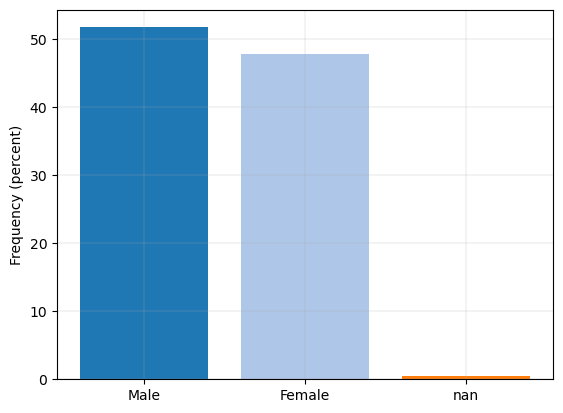

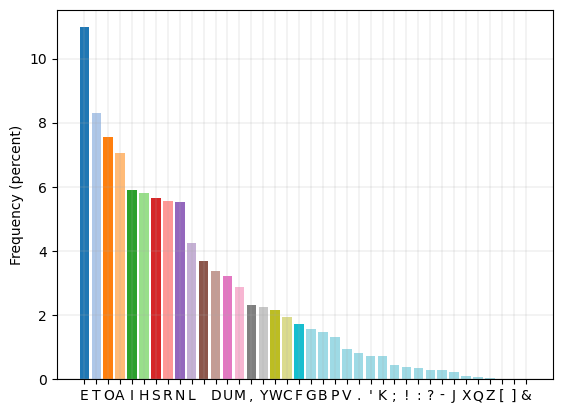

In [51]:
def msds_plot_summary_table_sorted(table, freqs=True, limit=100):
    fig, ax = plt.subplots()
    sorted_list = sorted(table.items(), key=lambda x: x[1]["cpt"], reverse=True)
    # sorted_list = table.items()
    print(sorted_list)
    x = [str(e[0]) for e in sorted_list]

    if freqs:
        y = [e[1]["freq"] for e in sorted_list]
        ylabel = "Frequency (percent)"
    else:
        y = [e[1]["cpt"] for e in sorted_list]
        ylabel = "Counts"

    cmap = plt.cm.tab20
    print(cmap)
    plt.grid(color="#aaa", linestyle="-", linewidth=0.2)
    # plt.xticks(rotation=90)
    ax.bar(x, y, color=cmap(range(len(sorted_list))))
    ax.set_ylabel(ylabel)


def test_msds_plot_summary_table_sorted():
    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    msds_plot_summary_table_sorted(summary_salary_data)

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_letters = msds_summary_table_full(txt_data.upper().replace(" ", ""))
        msds_plot_summary_table_sorted(summary_letters)


test_msds_plot_summary_table_sorted()

### [moderate] visualizing summary tables (Pareto-style)

Add cumulative relative frequency (as line chart) on top of your bar chart to build a *Pareto* chart.

Test your implementation on letter frequencies (Romeo and Juliet) and qualitative variables from `salary.csv`

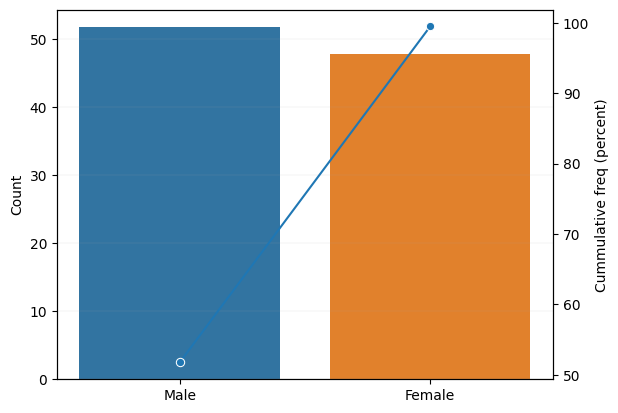

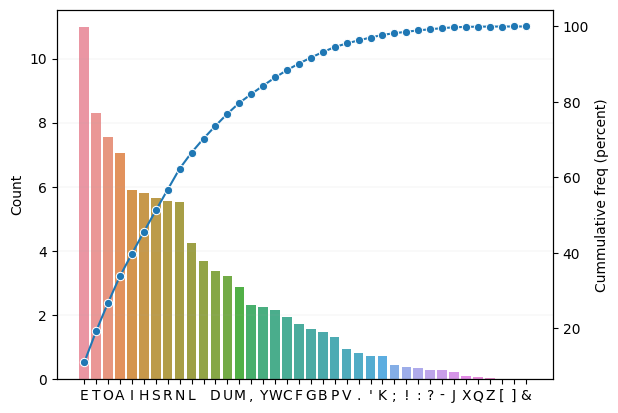

In [7]:
def msds_plot_summary_table_pareto(table):
    pass

def test_msds_plot_summary_table_sorted():
    salary_data = pd.read_csv("data/salary.csv")
    summary_salary_data = msds_summary_table_full(salary_data.Gender)
    msds_plot_summary_table_pareto(summary_salary_data)

    with open("data/romeo_juliet.txt") as fd:
        txt_data = fd.read()
        summary_letters = msds_summary_table_full(txt_data.upper().replace(" ", ""))
        msds_plot_summary_table_pareto(summary_letters)


test_msds_plot_summary_table_sorted()

## Quantitative data

To explore quantitative data, we will compute histograms.

### [easy] histogram computation

Write a function that computes histogram for a given quantitative dataset (iterable).
It should take two parameters:
 - the data (iterable with numerical values)
 - the number of bins $N$

It should return two lists:
 - a list of classes mid-points (X axis)
 - a list of relative frequency (in percent) (Y axis)

Test your implementation on quantitative variables of `salary.csv` and `weights_heights.csv` datasets.

In [59]:
def msds_histogram(data, N):
    min_data = min(data)
    max_data = max(data)
    range_data = max_data - min_data
    bins_count = [0] * N
    print(bins_count)
    print(f"min: {min_data}, max: {max_data}")
    for value in data:
        if not value or np.isnan(value):
            continue
        index = int(np.floor((value - min_data) / range_data * N))
        print(f"{value} => bin number {index}")
        bins_count[min(index, N - 1)] += 1
    return 


def test_msds_histogram():
    salary_data = pd.read_csv("../Session_01/data/salary.csv")
    hist_age, mp = msds_histogram(salary_data.Age, 10)
    assert hist_age[0] == 6
    assert hist_age[-1] == 17


test_msds_histogram()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
min: 23.0, max: 53.0
32.0 => bin number 3
28.0 => bin number 1
45.0 => bin number 7
36.0 => bin number 4
52.0 => bin number 9
29.0 => bin number 2
42.0 => bin number 6
31.0 => bin number 2
26.0 => bin number 1
38.0 => bin number 5
29.0 => bin number 2
48.0 => bin number 8
35.0 => bin number 4
40.0 => bin number 5
27.0 => bin number 1
44.0 => bin number 7
33.0 => bin number 3
39.0 => bin number 5
25.0 => bin number 0
51.0 => bin number 9
34.0 => bin number 3
47.0 => bin number 8
30.0 => bin number 2
36.0 => bin number 4
41.0 => bin number 6
28.0 => bin number 1
37.0 => bin number 4
24.0 => bin number 0
43.0 => bin number 6
33.0 => bin number 3
50.0 => bin number 9
31.0 => bin number 2
29.0 => bin number 2
39.0 => bin number 5
46.0 => bin number 7
27.0 => bin number 1
35.0 => bin number 4
42.0 => bin number 6
26.0 => bin number 1
49.0 => bin number 8
34.0 => bin number 3
48.0 => bin number 8
30.0 => bin number 2
36.0 => bin number 4
41.0 => bin number 6
28.

TypeError: cannot unpack non-iterable NoneType object

### [moderate] histogram computation (improved)

Write a function that computes histogram for a given quantitative dataset (iterable).
It should take two parameters:
 - the data (iterable with numerical values)
 - the number of bins $N$

It should return a list of dict with the following attributes:
 - `lower`: class lower bound 
 - `upper`: class upper bound 
 - `mid`: class midpoint
 - `count`: number of values in this class
 - `freq`: relative frequency (in percent)

[advanced] instead of returning a dict, define a class for handling histogram data

Test your implementation on quantitative variables of `salary.csv` and `weights_heights.csv` datasets.

In [10]:
def msds_histogram2(data, N=5):
    pass



def test_msds_histogram2():
    salary_data = pd.read_csv("data/salary.csv")
    hist_age = msds_histogram2(salary_data.Age, 10)
    assert hist_age[0]["lower"] == 23
    assert hist_age[0]["upper"] == 26
    assert (
        hist_age[0]["count"]
        == salary_data.loc[(salary_data.Age < 26) & (salary_data.Age >= 23)].Age.count()
    )
    assert abs(hist_age[0]["freq"] - 1.6085790884718498) < 1e-5
    assert (
        sum([x["freq"] for x in hist_age]) == 100
    ), f"{sum([x['freq'] for x in hist_age])}"


test_msds_histogram2()

### [easy] visualizing histogram data

Write a function that plots a frequency/number of occurrence dataset, with appropriate axis values and labels.

Test your implementation on quantitative variables of `salary.csv` and `weights_heights.csv` datasets.

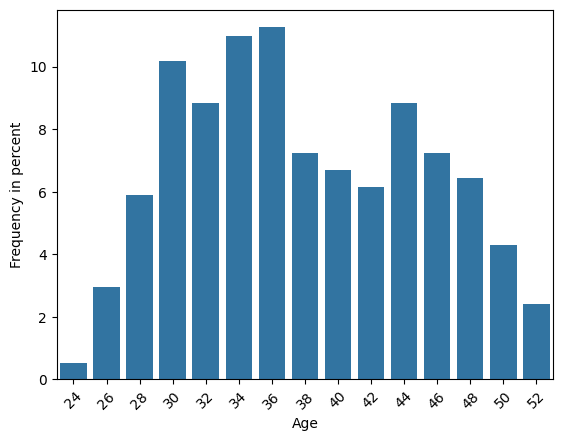

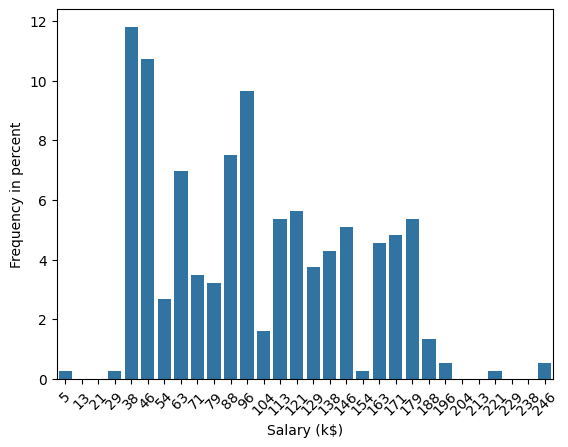

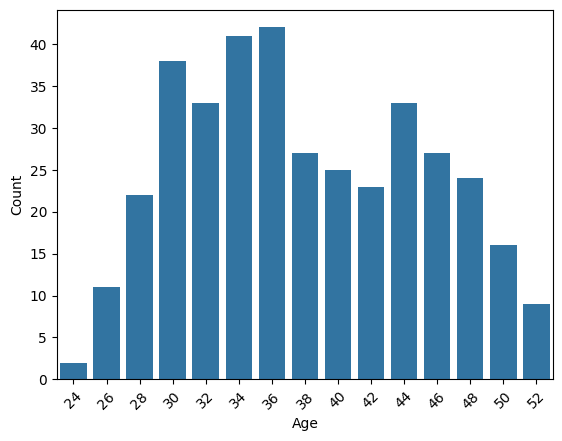

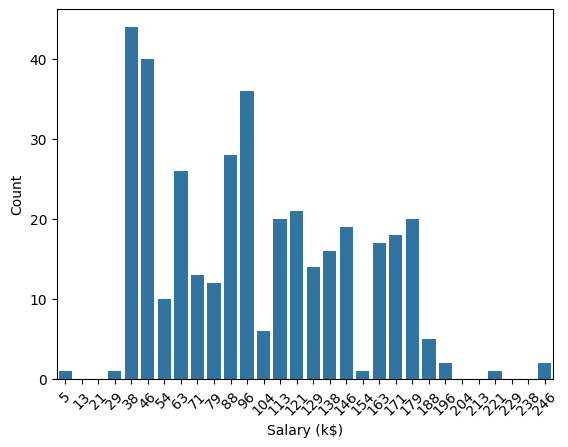

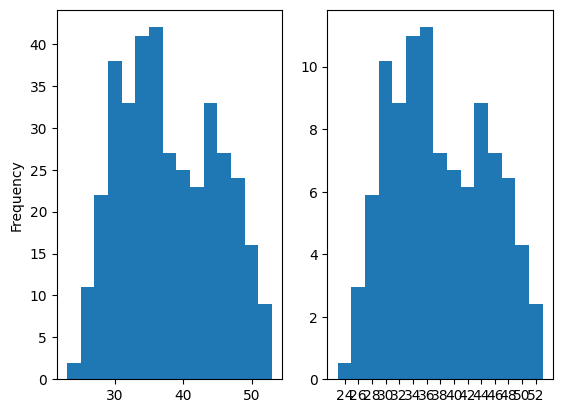

In [11]:
def msds_plot_histogram(hist_data, freqs=True, title=None):
    pass



def test_msds_plot_histogram():
    salary_data = pd.read_csv("data/salary.csv")
    age_hist = msds_histogram2(salary_data.Age, 15)
    msds_plot_histogram(age_hist, title="Age")
    msds_plot_histogram(
        msds_histogram2(salary_data.Salary / 1000, 30), title="Salary (k$)"
    )
    msds_plot_histogram(age_hist, title="Age", freqs=False)
    msds_plot_histogram(
        msds_histogram2(salary_data.Salary / 1000, 30), freqs=False, title="Salary (k$)"
    )
    fig, (ax1, ax2) = plt.subplots(1, 2)
    salary_data.Age.plot.hist(bins=15, ax=ax1)
    y = [x["freq"] for x in age_hist]
    x = ["{:.0f}".format(a["mid"]) for a in age_hist]
    ax2.bar(x, y, width=1)


test_msds_plot_histogram()

### [moderate] cummulative histograms

Write a function that computes cummulative frequency distribution given an histogram data.
It should take two parameters:
 - the data (iterable with numerical values)
 - the number of bins $N$

It should return two lists:
 - a list of classes mid-points (X axis)
 - a list of cumulative relative frequency (in percent) (Y axis)


In [12]:
def msds_cum_histogram(data, N=5):
    pass



def test_msds_cum_histogram():
    salary_data = pd.read_csv("data/salary.csv")
    for NB in [5, 10, 15, 20]:
        hist_age = msds_cum_histogram(salary_data.Age)
        assert hist_age[-1]["cum_freq"] == 100


test_msds_cum_histogram()

### [moderate] visualizing histogram and cumulative frequencies (Pareto style)

Write a function that plots a Pareto charts on some data, with histogram as bar chart and cumulative frequency as a line chart.

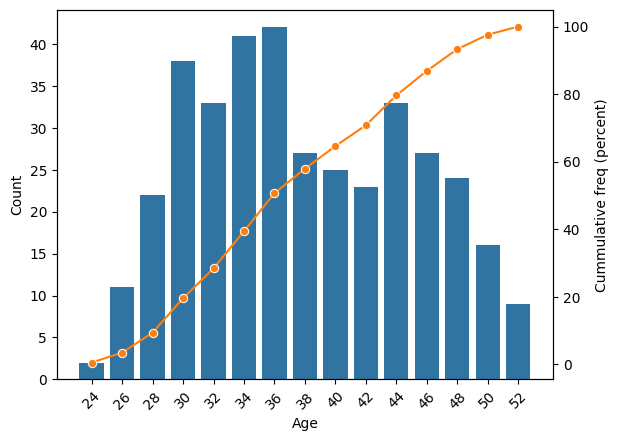

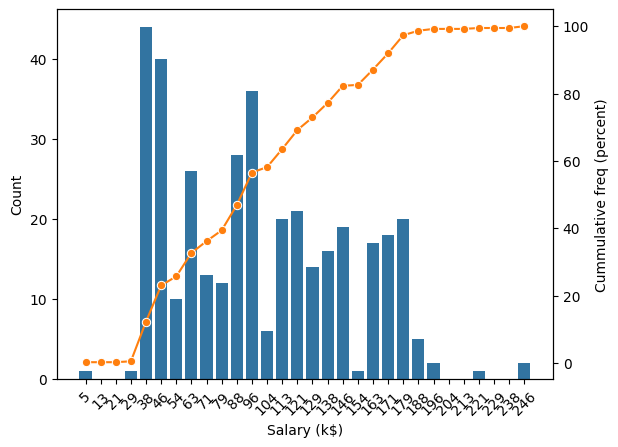

In [13]:
def msds_plot_histogram_pareto(hist_data, title=None):
    pass



def test_msds_plot_histogram_pareto():
    salary_data = pd.read_csv("data/salary.csv")
    msds_plot_histogram_pareto(msds_cum_histogram(salary_data.Age, 15), title="Age")
    msds_plot_histogram_pareto(
        msds_cum_histogram(salary_data.Salary / 1000, 30), title="Salary (k$)"
    )


test_msds_plot_histogram_pareto()